In [24]:
import sys
import pandas as pd
import csv
import numpy as np
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *
import plotly.graph_objects as go

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/GX 339-4.txt")

GX 339-4
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

name  xray_CI                         xray_obs_ref                  radio_obs_ref  extra_xray_text                                   extra_radio_text
0  GX 339-4       68  [Crook-Mansour et al. (in prep.) &]  [Tremou et al. (in prep.) & ]              NaN  The MeerKAT images can be found <a href='https...

In [4]:
source_df

name class       l_deg     b_deg                                   coordinates_refs     D              D_prob distance_distribution_text                                      distance_refs
0  GX 339-4    BH  338.939124 -4.326468  [https://ui.adsabs.harvard.edu/abs/2007A&A...4...  10.0  ("uniform", 8, 12)                   8.0-12.0  [https://ui.adsabs.harvard.edu/abs/2019MNRAS.4...

In [5]:
radio_df.head()

name     blockID band      t_radio  dt_radio      Rphase Rstate       Fr   Fr_unc  local_rms  alpha  alpha_unc  Fr_uplim_bool
0  GX 339-4  1523747370    L  58223.01521  0.078762  quiescence     QS  0.05580  0.01860        NaN    NaN        NaN           True
1  GX 339-4  1536428757    L  58369.74759  0.010181  quiescence     QS  0.12030  0.04010        NaN    NaN        NaN           True
2  GX 339-4  1536945357    L  58375.72670  0.010366  quiescence     QS  0.07860  0.02620        NaN    NaN        NaN           True
3  GX 339-4  1537547850    L  58382.69995  0.010181  quiescence     QS  0.07854  0.02618        NaN    NaN        NaN           True
4  GX 339-4  1538151240    L  58389.69665  0.022398  quiescence     QS  0.10590  0.03530        NaN    NaN        NaN           True

In [6]:
xray_df.head(4)

name          obsID       t_xray   dt_xray      Xphase Xstate            Fx      Fx_unc_l      Fx_unc_u  model  fit_stat  Fx_uplim_bool
0  GX 339-4  00032898172pc  58227.67748  0.412917  quiescence     QS  8.470000e-13  1.944199e-13  2.181171e-13    NaN       NaN          False
1  GX 339-4  00032898174pc  58370.33001  0.270370  quiescence     QS  3.020000e-13  1.412658e-13  1.963365e-13    NaN       NaN          False
2  GX 339-4  00032898175pc  58382.09152  0.127917  quiescence     QS  4.350000e-13  1.323527e-13  1.571409e-13    NaN       NaN          False
3  GX 339-4  00032898176pc  58389.49180  0.064850  quiescence     QS  6.070000e-13  2.080517e-13  2.592074e-13    NaN       NaN          False

# Light Curves

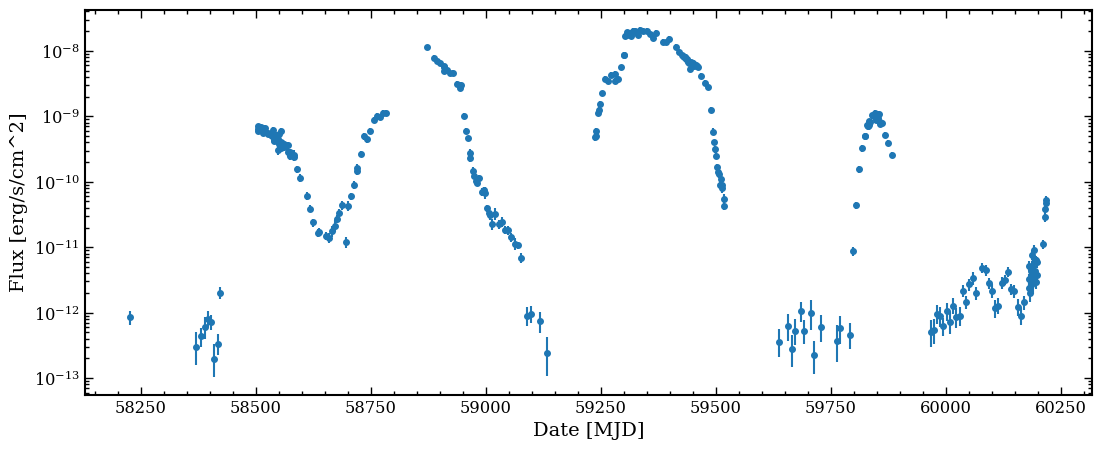

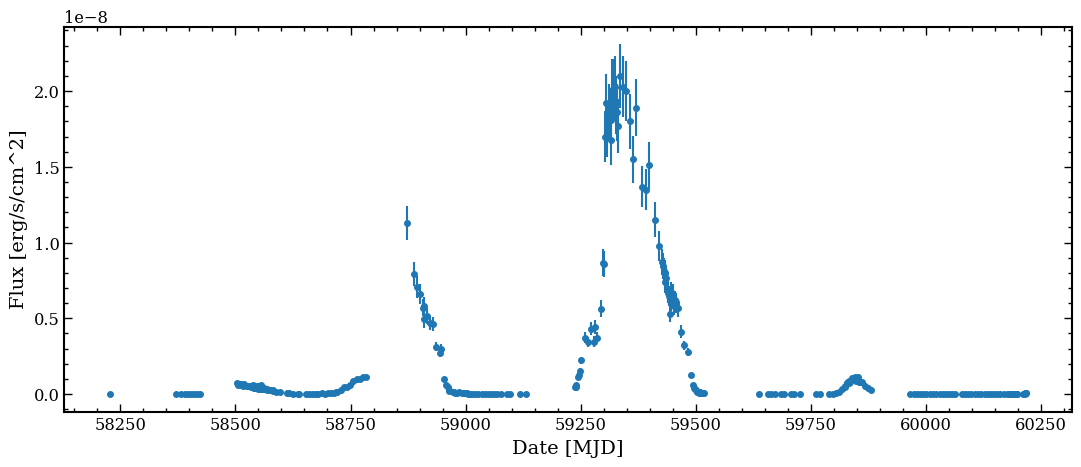

In [7]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

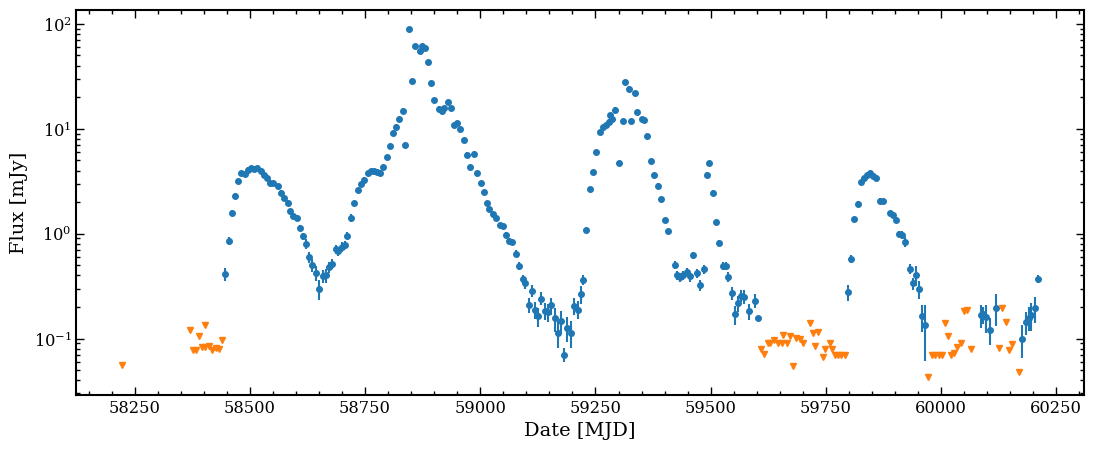

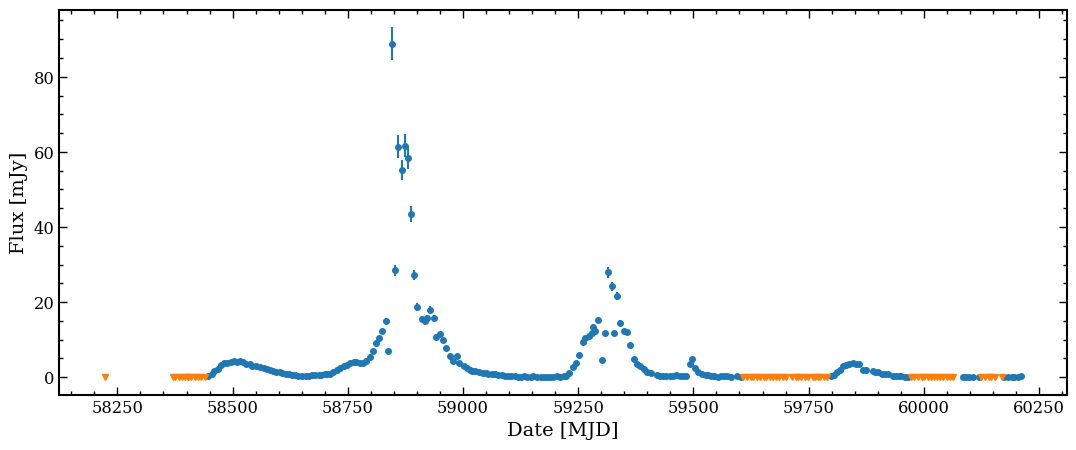

In [8]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [9]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58369.747590000     0.12030             0.04010             1         3.02000e-13                   1.41266e-13                   1.96337e-13                   True           False          QS             
58382.699950000     0.07854             0.02618             1         4.35000e-13                   1.32353e-13                   1.57141e-13                   True           False          QS             
58389.696650000     0.10590             0.03530             1         6.07000e-13                   2.08052e-13                   2.59207e-13                   True           False          QS             
58396.642200000     0.08319             0.02773             1         8.10000e-13                   2.11154e-13                   2.44790e-13                   True           F

In [12]:
len(paired_data)

101

In [10]:
lr_all, lx_all, all_types = get_bahramian_data()

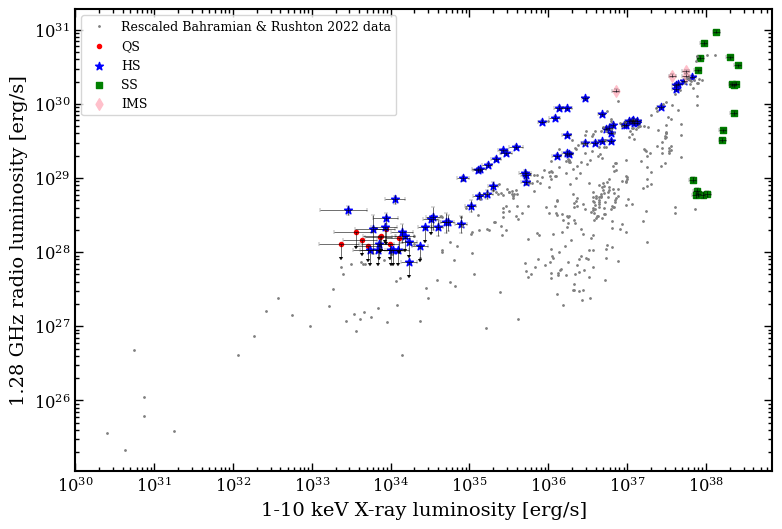

In [11]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

In [ ]:
#paired_data[["t", "Lr","Fr", "Fr_unc", "Lx"]].sort_values(by="Lx")
#paired_data[["t", "Lr","Fr", "Lx", "Fx"]].sort_values(by="t")

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  3978
Rejected based on distance: radio_MJD = 58223.01521; time_to_nearest: 4.662270000000717; time_to_furthest: 58223.01521
58369.74759: time_to_nearest: 0.5824199999988195 & time_to_furthest: 142.07011000000057; y_predict_err: 0.28095609541460576
Rejected based on distance: radio_MJD = 58375.7267; time_to_nearest: 5.396690000001399; time_to_furthest: 6.36482000000251
58382.69995: time_to_nearest: 0.6084300000002258 & time_to_furthest: 6.791850000001432; y_predict_err: 0.1532148205959487
58389.69665: time_to_nearest: 0.2048499999946216 & time_to_furthest: 6.69839000000502; y_predict_err: 0.17837460017835838
58396.6422: time_to_nearest: 0.24715999999898486 & time_to_furthest: 7.320110000000568; y_predict_err: 0.12965073284613737
58402.68382: time_to_nearest: 1.2784900000042398 & time_to_furthest: 6.288779999995313; y_predict_err: 0.11402016805975101
58403.6191: time_to_nearest: 0.34320999999908963 & time_to_furthest: 7.224060000000463; y_

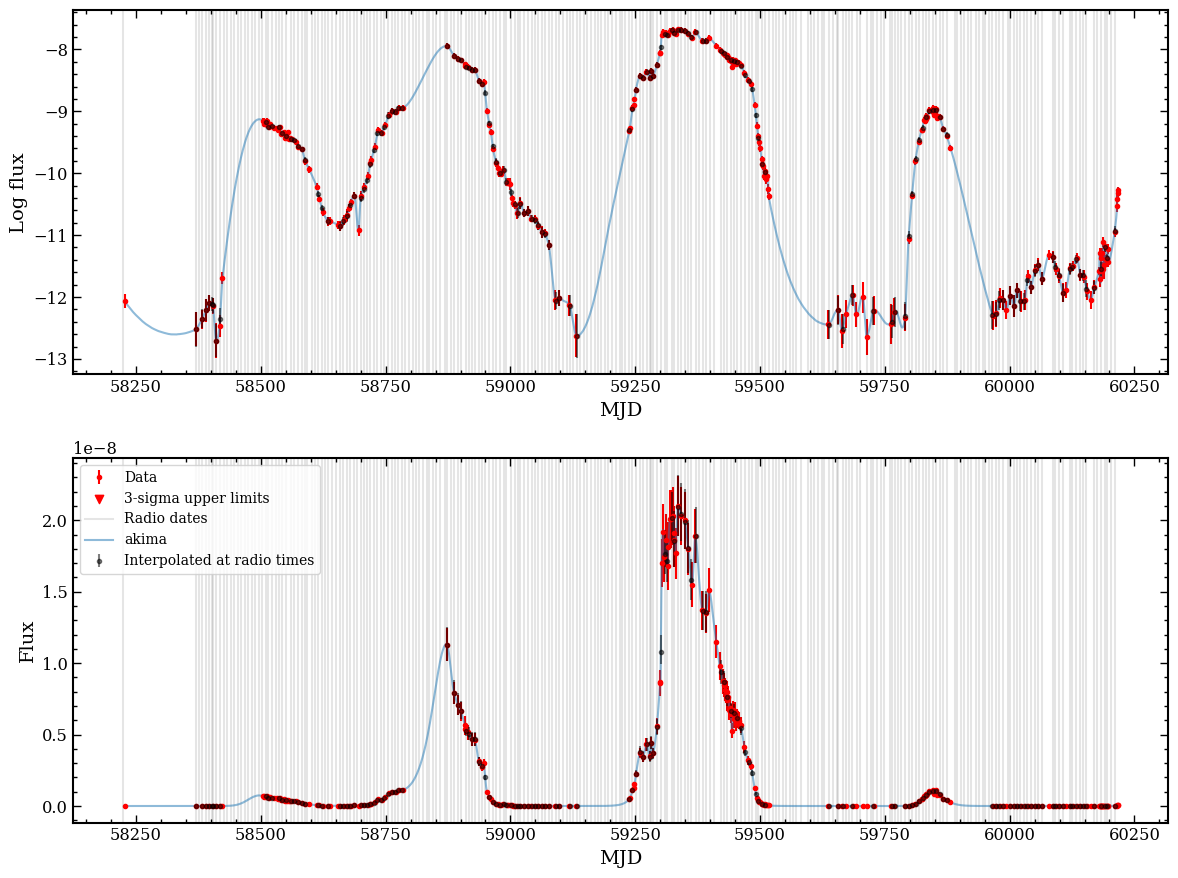

Number of used interpolated data points:  159
Converting to luminosity using d_kpc = 10.0


In [13]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

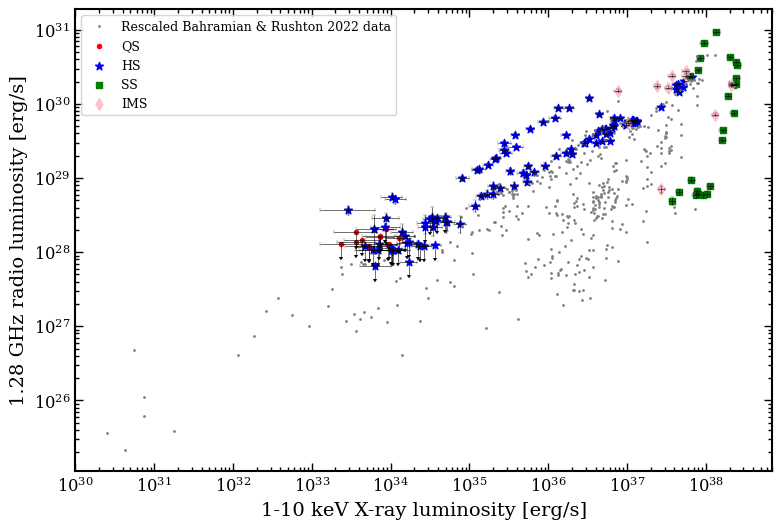

In [14]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)

---

# Time Evolution

In [19]:
plot_time_evolution_timed(paired_data)

---

# NICER Dates

In [ ]:
## Get NICER observation dates

csv_file_path = '../DATA/NICER/GX 339-4_NICER_dates.csv'

# Initialize a list to hold time values
time_values = []

# Read the CSV file
with open(csv_file_path, 'r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Clean the string: remove quotes and replace comma with dot
        time_str = row['time'].strip('"').replace(',', '.')
        time_values.append(float(time_str))

# Convert to NumPy array
nicer_dates = np.array(time_values)

In [23]:
## Get radio and Swift/XRT observation dates and states
radio_dates = radio_df["t_radio"].to_numpy()
radio_states = radio_df["Rstate"].to_numpy()
swift_dates = xray_df["t_xray"].to_numpy()


## Rough dates for the state transitions
transitions = [58835, 58920, 58950, 59295, 59310, 59480, 59492]

In [27]:
# Create the figure
fig = go.Figure()

# Add scatter plots
fig.add_trace(go.Scatter(
    x=radio_dates, y=[1]*len(radio_dates),
    mode='markers',
    marker=dict(color='red', size=3),
    name='Radio'
))

fig.add_trace(go.Scatter(
    x=swift_dates, y=[2]*len(swift_dates),
    mode='markers',
    marker=dict(color='blue', size=3),
    name='Swift/XRT'
))

fig.add_trace(go.Scatter(
    x=nicer_dates, y=[3]*len(nicer_dates),
    mode='markers',
    marker=dict(color='green', size=3),
    name='NICER'
))

# Add vertical dotted lines for transitions
for t in transitions:
    fig.add_shape(
        type='line',
        x0=t, x1=t, y0=0.5, y1=3.5,
        line=dict(color='black', width=1, dash='dot'),
        name='Transition'
    )

# Update layout
fig.update_layout(
    xaxis_title='MJD',
    xaxis=dict(
        title='Time',
        tickformat='.d',  # Ensure no scientific notation or suffixes
        tickmode='auto'
    ),
    yaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['Radio', 'Swift/XRT', 'NICER'],
        title='Observation Type'
    ),
    showlegend=True,
    height=700
)

# Show the plot
fig.show()

In [29]:
# How many additional points would I get by including NICER data?


## Define binning function
def get_paired_flags(radio_dates, xray_dates, window_days=1.0):
    flags = np.array([
        np.any(np.abs(xray_dates - rd) <= window_days)
        for rd in radio_dates
    ])
    return flags

## Pairing check for all radio_dates
paired_nicer = get_paired_flags(radio_dates, nicer_dates)
paired_swift = get_paired_flags(radio_dates, swift_dates)

## Find how many nicer-paired are not swift-paired
exclusive_nicer = paired_nicer & ~paired_swift
num_exclusive_nicer = np.sum(exclusive_nicer)

## Repeat for subset where state is "HS" or "QS"
hs_qs_mask = np.isin(radio_states, ["HS", "QS"])

## Apply mask
radio_dates_hs_qs = radio_dates[hs_qs_mask]
nicer_paired_hs_qs = get_paired_flags(radio_dates_hs_qs, nicer_dates)
swift_paired_hs_qs = get_paired_flags(radio_dates_hs_qs, swift_dates)
exclusive_nicer_hs_qs = nicer_paired_hs_qs & ~swift_paired_hs_qs
num_exclusive_nicer_hs_qs = np.sum(exclusive_nicer_hs_qs)

## Final outputs
print("Total radio dates:", len(radio_dates))
print("Paired with NICER:", np.sum(paired_nicer))
print("Paired with Swift/XRT:", np.sum(paired_swift))
print("NICER-only paired (not in Swift):", num_exclusive_nicer)

print("\nSubset (state in ['HS', 'QS']):")
print("Total:", len(radio_dates_hs_qs))
print("Paired with NICER:", np.sum(nicer_paired_hs_qs))
print("Paired with Swift/XRT:", np.sum(swift_paired_hs_qs))
print("NICER-only paired (not in Swift/XRT):", num_exclusive_nicer_hs_qs)

Total radio dates: 259
Paired with NICER: 52
Paired with Swift/XRT: 101
NICER-only paired (not in Swift): 21

Subset (state in ['HS', 'QS']):
Total: 214
Paired with NICER: 28
Paired with Swift/XRT: 79
NICER-only paired (not in Swift/XRT): 8
